In [15]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [16]:
def read_fits(file):
    with fits.open(file) as hdul:
        data = hdul[0].data
    return data

def find_pixel_with_value(data, value):
    result = np.where(data == value)
    coordinates = list(zip(result[0], result[1]))
    return coordinates


#  plot pixel values over time for each pixel 
def plot_pixel_values_separately(pixel_coords, files):
    for coord in pixel_coords:
        pixel_values = []
        for file in files:
            data = read_fits(file)
            int_coord = (int(coord[0]), int(coord[1]))
            pixel_values.append(data[int_coord])
        
        plt.figure(figsize=(10, 8))
        plt.plot(pixel_values, label=f'Pixel {coord}')
        plt.xlabel('Image Index')
        plt.ylabel('Pixel Value')
        plt.title(f'Pixel Value Over Time for {coord}')
        plt.grid()
        plt.legend()
        plt.show()

## 4ramp_1reset_1read

7156.633868217468 7779.0
7173.793061494827 7796.0
7168.649068593979 7788.0
7191.349774122238 7815.0
Median of 3-2 difference: 32.0
Mean of 3-2 difference: 11636.77883052826
Number of negative values: 0
Range of 3-2 difference: 0 to 65535


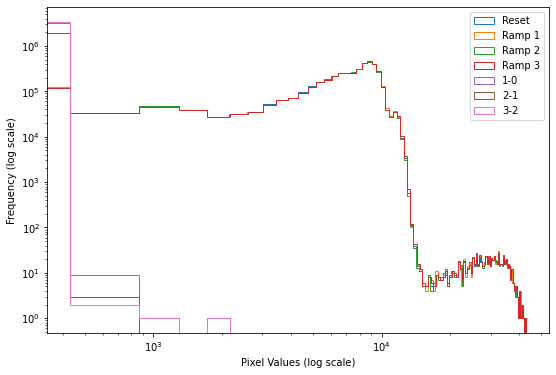

In [14]:
number_of_files = 4  
fits_files = [f'ramp_mode_single_ended/4ramp_1reset_1read/Frame_R000{i+1}_M0001_N0001.fits' for i in range(number_of_files)]

fig, ax = plt.subplots(figsize=(9, 6))

labels = ['Reset','Ramp 1','Ramp 2','Ramp 3']

datarr = []
for f in fits_files:
    datarr.append(read_fits(f))

for i, data in enumerate(datarr):
    h, bins, _ = ax.hist(data.flatten(), bins=100, histtype='step', label=labels[i])
    print(np.mean(data), np.median(data))    
ax.hist((datarr[1]-datarr[0]).flatten(),bins=bins,histtype='step',label='1-0')
ax.hist((datarr[2]-datarr[1]).flatten(),bins=bins,histtype='step',label='2-1')
ax.hist((datarr[3]-datarr[2]).flatten(),bins=bins,histtype='step',label='3-2')
print("Median of 3-2 difference:", np.median(datarr[3]-datarr[2]))
print("Mean of 3-2 difference:", np.mean(datarr[3]-datarr[2]))

difference_3_2 = datarr[3]-datarr[2]
negative_values = difference_3_2[difference_3_2 < 0]

# Print the number of negative values
print("Number of negative values:", len(negative_values))

# Print the range of the difference
print("Range of 3-2 difference:", np.min(difference_3_2), "to", np.max(difference_3_2))

plt.xscale('log')
plt.yscale('log')
ax.set_xlabel('Pixel Values (log scale)')
ax.set_ylabel('Frequency (log scale)')
ax.legend()
plt.show()

## 10ramp_1reset_1read

7874.591287612915 8437.0
7885.967861652374 8448.0
7875.25582742691 8436.0
7887.584550142288 8447.0
7877.5730192661285 8438.0
7881.136752128601 8445.0
7869.339812994003 8433.0
7860.631130456924 8423.0
7867.31916809082 8431.0


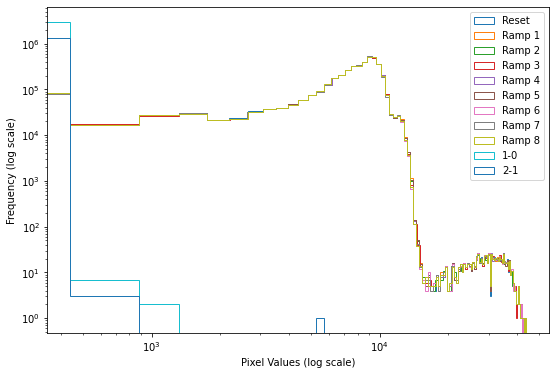

In [12]:
number_of_files = 9  
fits_files = [f'ramp_mode_single_ended/10ramp_1reset_1read/Frame_R000{i+1}_M0001_N0001.fits' for i in range(number_of_files)]

fig, ax = plt.subplots(figsize=(9, 6))

labels = ['Reset','Ramp 1','Ramp 2','Ramp 3', 'Ramp 4', 'Ramp 5', 'Ramp 6','Ramp 7','Ramp 8','Ramp 9']

datarr = []
for f in fits_files:
    datarr.append(read_fits(f))

for i, data in enumerate(datarr[0:9]):
    h, bins, _ = ax.hist(data.flatten(), bins=100, histtype='step', label=labels[i])
    print(np.mean(data), np.median(data))    
ax.hist((datarr[1]-datarr[0]).flatten(),bins=bins,histtype='step',label='1-0')
ax.hist((datarr[2]-datarr[1]).flatten(),bins=bins,histtype='step',label='2-1')
plt.xscale('log')
plt.yscale('log')
ax.set_xlabel('Pixel Values (log scale)')
ax.set_ylabel('Frequency (log scale)')
ax.legend()
plt.show()

## 4ramp_1reset_4read

7157.9424114227295 7783.0
7378.867855787277 8100.0
7202.914946317673 8016.0
7121.03546833992 7958.0
7184.237179756165 7804.0
7423.962288618088 8114.0
7172.545339107513 7997.0
7184.511889457703 7998.0
7186.074979305267 7802.0
7447.392071008682 8117.0
7261.760028600693 8048.0
7227.513331413269 8018.0
7185.804254293442 7802.0
7458.903333902359 8115.0
7308.387274503708 8065.0
7270.436108827591 8040.0


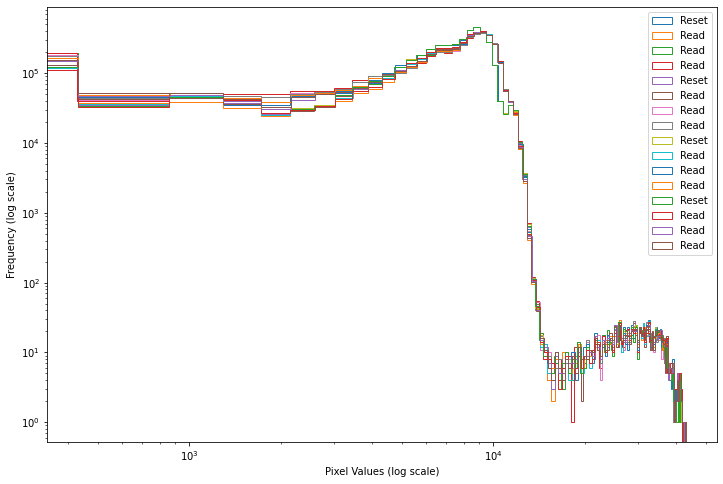

In [7]:
number_of_files = 16
fits_files = []

for r in range(1, 5):  # R0001 to R0004
    for i in range(4):  # N0001 to N0004
        fits_files.append(f'ramp_mode_single_ended/4ramp_1reset_4read/Frame_R{r:04d}_M0001_N000{i+1}.fits')

fig, ax = plt.subplots(figsize=(12, 8))
labels = ['Reset', 'Read', 'Read', 'Read'] * 4

for i, f in enumerate(fits_files):
    data = read_fits(f)
    ax.hist(data.flatten(), bins=100, histtype='step', label=labels[i])
    print(np.mean(data), np.median(data))

plt.xscale('log')
plt.yscale('log')
ax.set_xlabel('Pixel Values (log scale)')
ax.set_ylabel('Frequency (log scale)')
ax.legend()
plt.show()

7157.9424114227295 7783.0
7184.237179756165 7804.0
7186.074979305267 7802.0
7185.804254293442 7802.0


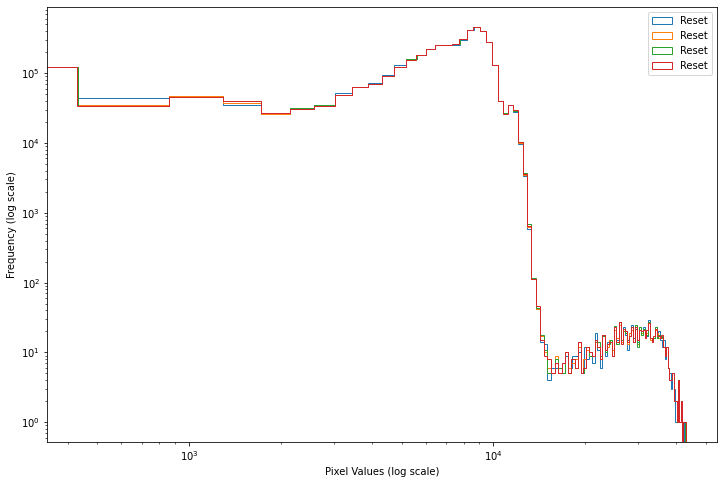

In [59]:
number_of_files = 16
fits_files = []

# Generate filenames
for r in range(1, 5):  # R0001 to R0004
    for i in range(4):  # N0001 to N0004
        fits_files.append(f'ramp_mode_single_ended/4ramp_1reset_4read/Frame_R{r:04d}_M0001_N000{i+1}.fits')

reset_files = [f for i, f in enumerate(fits_files) if i % 4 == 0]

fig, ax = plt.subplots(figsize=(12, 8))
labels = ['Reset'] * len(reset_files)

for i, f in enumerate(reset_files[0:4]):
    data = read_fits(f)
    ax.hist(data.flatten(), bins=100, histtype='step', label=labels[i])
    print(np.mean(data), np.median(data))

plt.xscale('log')
plt.yscale('log')
ax.set_xlabel('Pixel Values (log scale)')
ax.set_ylabel('Frequency (log scale)')
ax.legend()
plt.show()

## 1ramp_1reset_4read

In [3]:
first_file = 'ramp_mode_single_ended/1ramp_1reset_4read/Frame_R0001_M0001_N0001.fits'
data = read_fits(first_file)

pixel_value = 27474
coordinates = find_pixel_with_value(data, pixel_value)

print(f"The coordinates of the pixel with value {pixel_value} are: {coordinates}")

The coordinates of the pixel with value 27474 are: [(818, 597)]


## cds

6851.008756875992 7493.0
7049.895971536636 7825.0


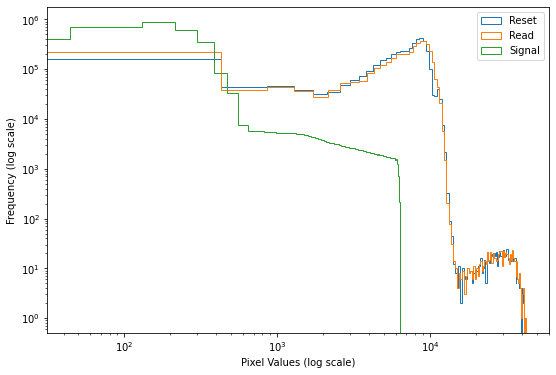

In [9]:
number_of_files = 2  

fits_files = [f'cds/Frame_R01_M01_N0{i+1}.fits' for i in range(number_of_files)]
fig,ax=plt.subplots(figsize=(9,6))
labels = ['Reset', 'Read']

for i,f in enumerate(fits_files):
    data = read_fits(f)
    ax.hist(data.flatten(),bins=100,histtype='step', label=labels[i]);
    print (np.mean(data),np.median(data))
diff = read_fits(f'cds/CDSResult.fits')
ax.hist(diff.flatten(),bins=100,histtype='step', label='Signal');
plt.xscale('log')
plt.yscale('log')
ax.set_xlabel('Pixel Values (log scale)')
ax.set_ylabel('Frequency (log scale)')
ax.legend()
plt.show()

6849.212629318237 7498.0
7029.05250787735 7812.0
6740.99720287323 7617.0
6686.773895263672 7558.0


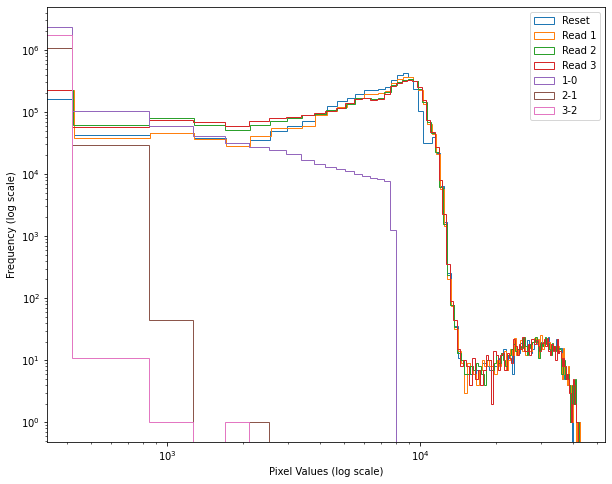

In [38]:
number_of_files = 4  
fits_files = [f'ramp_mode_single_ended/1ramp_1reset_4read/Frame_R0001_M0001_N000{i+1}.fits' for i in range(number_of_files)]

fig, ax = plt.subplots(figsize=(10, 8))

labels = ['Reset', 'Read 1', 'Read 2', 'Read 3']

datarr = []
for f in fits_files:
    datarr.append(read_fits(f))

for i, data in enumerate(datarr):
    h, bins, _ = ax.hist(data.flatten(), bins=100, histtype='step', label=labels[i])
    print(np.mean(data), np.median(data))    
ax.hist((datarr[1]-datarr[0]).flatten(),bins=bins,histtype='step',label='1-0')
ax.hist((datarr[2]-datarr[1]).flatten(),bins=bins,histtype='step',label='2-1')
ax.hist((datarr[3]-datarr[2]).flatten(),bins=bins,histtype='step',label='3-2')


plt.xscale('log')
plt.yscale('log')
ax.set_xlabel('Pixel Values (log scale)')
ax.set_ylabel('Frequency (log scale)')
ax.legend()
plt.show()

## 1ramp_0reset_4read

In [ ]:
first_file = 'ramp_mode_single_ended/1ramp_1reset_4read/Frame_R0001_M0001_N0001.fits'
data = read_fits(first_file)

pixel_value = 30015
coordinates = find_pixel_with_value(data, pixel_value)

print(f"The coordinates of the pixel with value {pixel_value} are: {coordinates}")

In [11]:
# number_of_files = 4  

# fits_files = [f'ramp_mode_single_ended/1ramp_0reset_4read/Frame_R0001_M0001_N000{i+1}.fits' for i in range(number_of_files)]

# # Coordinates of bad pixels to analyze
# bad_pixel_coords = [(818, 594),(818, 597)]  
# plot_pixel_values_separately(bad_pixel_coords, fits_files)

6852.841738462448 7491.0
7128.986757993698 7826.0
6879.284364461899 7721.0
6760.746997833252 7611.0


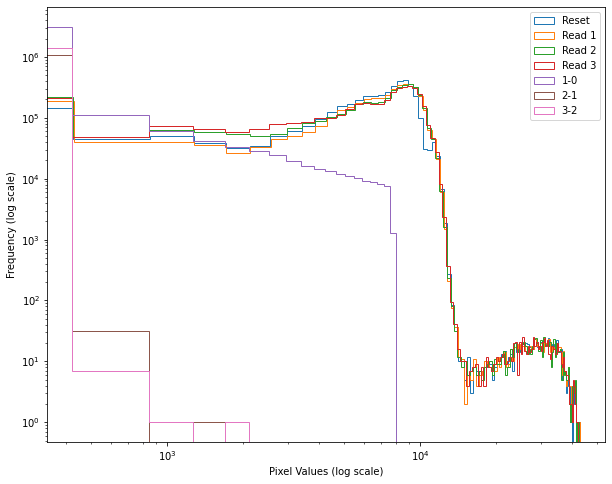

In [43]:
number_of_files = 4  
fits_files = [f'ramp_mode_single_ended/1ramp_0reset_4read/Frame_R0001_M0001_N000{i+1}.fits' for i in range(number_of_files)]

fig, ax = plt.subplots(figsize=(10, 8))

labels = ['Reset', 'Read 1', 'Read 2', 'Read 3']

datarr = []
for f in fits_files:
    datarr.append(read_fits(f))

for i, data in enumerate(datarr):
    h, bins, _ = ax.hist(data.flatten(), bins=100, histtype='step', label=labels[i])
    print(np.mean(data), np.median(data))    
ax.hist((datarr[1]-datarr[0]).flatten(),bins=bins,histtype='step',label='1-0')
ax.hist((datarr[2]-datarr[1]).flatten(),bins=bins,histtype='step',label='2-1')
ax.hist((datarr[3]-datarr[2]).flatten(),bins=bins,histtype='step',label='3-2')


plt.xscale('log')
plt.yscale('log')
ax.set_xlabel('Pixel Values (log scale)')
ax.set_ylabel('Frequency (log scale)')
ax.legend()
plt.show()

## 1ramp_2reset_4read

In [16]:
first_file = 'ramp_mode_single_ended/1ramp_2reset_4read/Frame_R0001_M0001_N0001.fits'
data = read_fits(first_file)

pixel_value = 33037
coordinates = find_pixel_with_value(data, pixel_value)

print(f"The coordinates of the pixel with value {pixel_value} are: {coordinates}")

The coordinates of the pixel with value 33037 are: [(818, 596)]


7217.744827985764 7807.0
7390.012294769287 7999.0


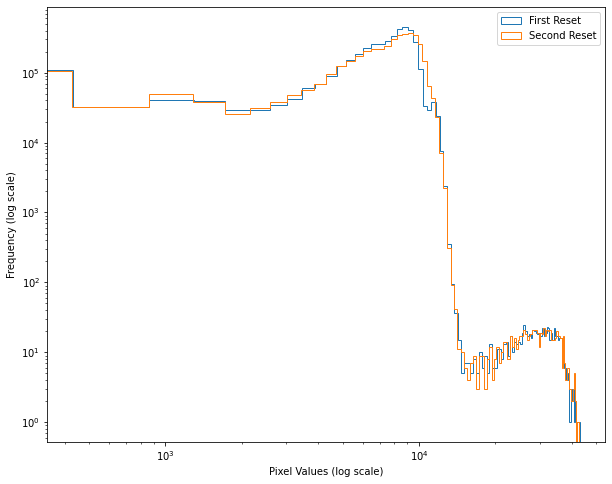

In [47]:
number_of_files = 4  
fits_files = [f'ramp_mode_single_ended/1ramp_2reset_4read/test2/Frame_R0001_M0001_N000{i+1}.fits' for i in range(number_of_files)]

fig, ax = plt.subplots(figsize=(10, 8))

labels = ['First Reset', 'Second Reset', 'First Read', 'Second Read']

datarr = []
for f in fits_files:
    datarr.append(read_fits(f))

for i, data in enumerate(datarr[0:2]):
    h, bins, _ = ax.hist(data.flatten(), bins=100, histtype='step', label=labels[i])
    print(np.mean(data), np.median(data))    
# ax.hist((datarr[1]-datarr[0]).flatten(),bins=bins,histtype='step',label='1-0')
# ax.hist((datarr[2]-datarr[1]).flatten(),bins=bins,histtype='step',label='2-1')
# ax.hist((datarr[3]-datarr[2]).flatten(),bins=bins,histtype='step',label='3-2')


plt.xscale('log')
plt.yscale('log')
ax.set_xlabel('Pixel Values (log scale)')
ax.set_ylabel('Frequency (log scale)')
ax.legend()
plt.show()

## 1ramp_4reset_4read

7123.681703090668 7750.0
7347.637742757797 8064.0
7164.088578701019 7975.0
7075.049424171448 7914.0


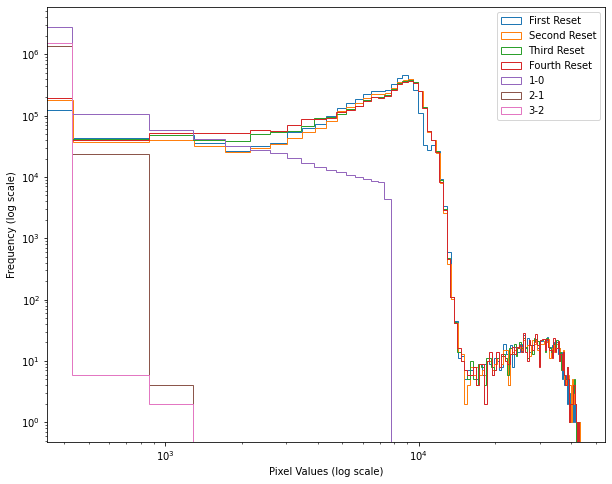

In [17]:
number_of_files = 4  
fits_files = [f'ramp_mode_single_ended/1ramp_4reset_4read/Frame_R0001_M0001_N000{i+1}.fits' for i in range(number_of_files)]

fig, ax = plt.subplots(figsize=(10, 8))

labels = ['First Reset', 'Second Reset', 'Third Reset', 'Fourth Reset']

datarr = []
for f in fits_files:
    datarr.append(read_fits(f))

for i, data in enumerate(datarr[0:4]):
    h, bins, _ = ax.hist(data.flatten(), bins=100, histtype='step', label=labels[i])
    print(np.mean(data), np.median(data))    
ax.hist((datarr[1]-datarr[0]).flatten(),bins=bins,histtype='step',label='1-0')
ax.hist((datarr[2]-datarr[1]).flatten(),bins=bins,histtype='step',label='2-1')
ax.hist((datarr[3]-datarr[2]).flatten(),bins=bins,histtype='step',label='3-2')


plt.xscale('log')
plt.yscale('log')
ax.set_xlabel('Pixel Values (log scale)')
ax.set_ylabel('Frequency (log scale)')
ax.legend()
plt.show()

## 1_ramp_6reset_4read

7111.993597745895 7732.0
7371.9246282577515 8001.0
7224.949944972992 7933.0
7108.54593873024 7839.0


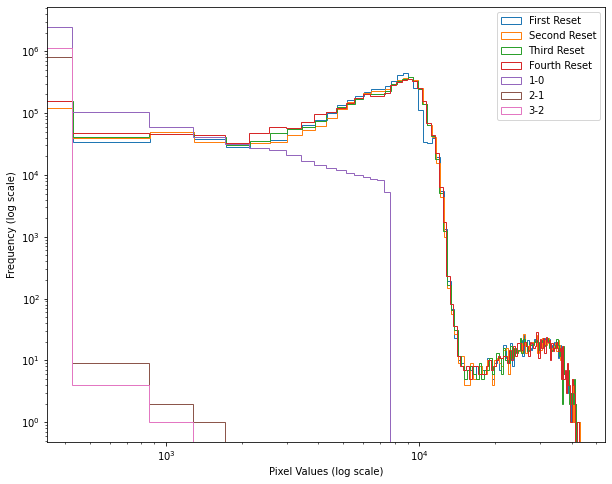

In [19]:
number_of_files = 4  
fits_files = [f'ramp_mode_single_ended/1ramp_6reset_4read/Frame_R0001_M0001_N000{i+1}.fits' for i in range(number_of_files)]

fig, ax = plt.subplots(figsize=(10, 8))

labels = ['First Reset', 'Second Reset', 'Third Reset', 'Fourth Reset']

datarr = []
for f in fits_files:
    datarr.append(read_fits(f))

for i, data in enumerate(datarr[0:4]):
    h, bins, _ = ax.hist(data.flatten(), bins=100, histtype='step', label=labels[i])
    print(np.mean(data), np.median(data))    
ax.hist((datarr[1]-datarr[0]).flatten(),bins=bins,histtype='step',label='1-0')
ax.hist((datarr[2]-datarr[1]).flatten(),bins=bins,histtype='step',label='2-1')
ax.hist((datarr[3]-datarr[2]).flatten(),bins=bins,histtype='step',label='3-2')


plt.xscale('log')
plt.yscale('log')
ax.set_xlabel('Pixel Values (log scale)')
ax.set_ylabel('Frequency (log scale)')
ax.legend()
plt.show()